# Packages

In [1]:
import os
os.getcwd()

'/Users/sera/company/TopicModeling'

In [2]:
import numpy as np
import pandas as pd
import re
import time
from tqdm import tqdm
import matplotlib.pyplot as plt

# EDA

In [3]:
with open('./data/[2155330]result.txt') as f : 
    data = f.readlines()

In [4]:
len(data)

89864

In [5]:
colnames = 'type_, srno_, date_, time_, proc_, press_, sector1_, sector2_, sector3_, sector4_, stock_cnt_, stock_, title_, body_'
colnames = colnames.split(', ')
colnames

['type_',
 'srno_',
 'date_',
 'time_',
 'proc_',
 'press_',
 'sector1_',
 'sector2_',
 'sector3_',
 'sector4_',
 'stock_cnt_',
 'stock_',
 'title_',
 'body_']

In [6]:
len(colnames)

14

## 이상치/error 데이터 확인

100%|█████████████████████████████████| 89864/89864 [00:00<00:00, 524099.18it/s]


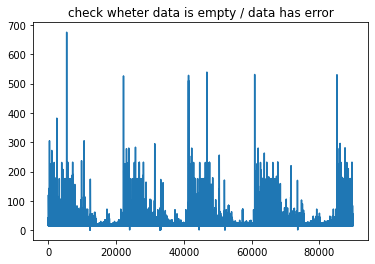

In [7]:
# , 으로 parsing했을 때 압도적으로 적게 정보가 저장된 경우가 있는지 확인
check_err = []
for doc in tqdm(range(len(data))):
    check_err.append(len(data[doc].split(',')))
plt.plot(check_err)
plt.title('check wheter data is empty / data has error')
plt.show()

`,`으로 파싱후 각 컬럼당 내용이 압도적으로 적은 부분이 있는 것을 확인-> 내용이 비거나 거의 의미없는 데이터(예: error)가 존재함을 확인  
columns 수대로 `,`로 정상 분할 되었다면 14열로 분리되는 것이 맞음  
즉, 14개 미만인 것은 비정상일 확률이 높음

In [8]:
pd.DataFrame(check_err).describe()

0
count  89864.000000
mean      21.330477
std       17.648118
min        1.000000
25%       14.000000
50%       17.000000
75%       22.000000
max      675.000000

In [9]:
outlier_idx = []
for idx, cnts in tqdm(enumerate(check_err)):
    if(cnts<14) :
        outlier_idx.append(idx)
    

89864it [00:00, 858504.45it/s]


In [10]:
outlier_idx

[12271,
 12281,
 12296,
 12312,
 12329,
 12349,
 24024,
 33000,
 33023,
 33038,
 33057,
 33072,
 33089,
 33099,
 33112,
 33130,
 33145,
 33167,
 33177,
 44527,
 52157,
 52170,
 73643]

In [11]:
len(outlier_idx)

23

23개의 이상치가 의심되는 데이터가 존재

In [12]:
for i in outlier_idx:
    print(data[i])

error

error

error

error

error

error

error

error

error

error

error

error

error

error

error

error

error

error

error

error

error

error

error



error로 저장된 모습 확인

## \x00 제거

In [13]:
data = [doc.replace('\x00','') for doc in data]

## column 별 list로 저장

In [14]:
#컬럼별로 따로 list로 저장 : title, body만 우선 저장
title_ = []
body_ = []
#title, body를 제외한 다른 항목들
info = []
#title, body 저장
for doc in tqdm(range(len(data))):
    
    try : 
        tmp = data[doc].split('"')
        
        #\n 개행자 제거
        tmp.pop() 

        body_.append(tmp.pop())

        #,제거
        tmp.pop() 

        title_.append(tmp.pop())

        info.append(''.join(tmp).split(','))
    
    except :
        #error는 빈값으로 저장
        title_.append('')
        body_.append('')
        info.append('')
        



100%|█████████████████████████████████| 89864/89864 [00:00<00:00, 391599.57it/s]


In [15]:
len(body_)

89864

In [16]:
title_[:5]

['<강수지의 외환분석> FOMC와 슬로우플레이션',
 '더본코리아 한신포차, ‘한신무뼈닭발’ 전 매장 출시',
 "'유명 영화감독 속옷 사주더니…' 성폭행 '미투' 논란",
 '[클릭 e종목] 대한유화, 본업의 수익성 확인할때',
 '게임빌, NFT 사업 확장으로 밸류에이션 리레이팅-하이']

In [17]:
info

[['DRNS',
  '02021110107525693668',
  '20211101',
  '075256',
  '1',
  '연합뉴스',
  '03',
  '02',
  '002',
  '',
  '',
  ' ',
  ''],
 ['DRNS',
  '02021110107525754069',
  '20211101',
  '075257',
  '1',
  '아시아 경제',
  'D0',
  'S2N231',
  '',
  '',
  '',
  ' ',
  ''],
 ['DRNS',
  '02021110107531148870',
  '20211101',
  '075311',
  '1',
  '한국경제신문',
  '10',
  '0000',
  '0000',
  'C990',
  '',
  ' ',
  ''],
 ['DRNS',
  '02021110107530154471',
  '20211101',
  '075301',
  '1',
  '아시아 경제',
  'A0',
  'S2N49',
  '',
  '',
  '',
  ' ',
  ''],
 ['X526',
  '02021110107532698072',
  '20211101',
  '075326',
  'I',
  '이데일리',
  'S5',
  '04006009 ',
  '',
  '0',
  '01',
  '063080 ',
  ''],
 ['DRNS',
  '02021110107531454973',
  '20211101',
  '075314',
  '2',
  '아시아 경제',
  'A0',
  'S2N49',
  '',
  '',
  '01',
  '006650 ',
  ''],
 ['X526',
  '02021110107535015074',
  '20211101',
  '075350',
  'I',
  '머니투데이',
  'A01',
  '',
  '',
  '0',
  '03',
  '041510 048550 054780 ',
  ''],
 ['DRNS',
  '02021103108010053943

In [18]:
cols_num = []
set([len(i) for i in info])

{0, 13}

즉 모두다 13개로 잘 나눠진것으로 보아 순서대로 `type, srno, date, time, proc, press, sector1, sector2, sector3, sector4, stock_cnt, stock` 부여하면 될듯

In [19]:
#컬럼별로 따로 list로 저장 : 나머지 저장

type_ = [] ; srno_= [] ; date_ = [] ; time_= [] ; proc_= [] ; press_= [] ; sector1_= [] 
sector2_= [] ; sector3_= [] ; sector4_= [] ; stock_cnt_= [] ; stock_ = []
for doc in tqdm(info):
    
    try : 
        type_.append(doc[0])
        srno_.append(doc[1])
        date_.append(doc[2])
        time_.append(doc[3])
        proc_.append(doc[4])
        press_.append(doc[5])
        sector1_.append(doc[6])
        sector2_.append(doc[7])
        sector3_.append(doc[8])
        sector4_.append(doc[9])
        stock_cnt_.append(doc[10])
        stock_.append(doc[11])
            
        

    except : 
        #error는 빈값으로 저장
        type_.append('')
        srno_.append('')
        date_.append('')
        time_.append('')
        proc_.append('')
        press_.append('')
        sector1_.append('')
        sector2_.append('')
        sector3_.append('')
        sector4_.append('')
        stock_cnt_.append('')
        stock_.append('')

100%|████████████████████████████████| 89864/89864 [00:00<00:00, 1271851.25it/s]


In [20]:
press_[:5]

['연합뉴스', '아시아 경제', '한국경제신문', '아시아 경제', '이데일리']

In [21]:
# #컬럼별로 따로 list로 저장 : 나머지 저장
## 자동화 코드인데..왜 안되는지 잘 모르겠다...

# type_ = [] ; srno= [] ; date = [] ; time= [] ; proc= [] ; press= [] ; sector1= [] 
# sector2= [] ; sector3= [] ; sector4= [] ; stock_cnt= [] ; stock = []
# cnt=0
# for doc_num, doc in tqdm(enumerate(info)):
#     #error 문서 제외
    
#     try : 
            
#         for idx in range(0,12): 
#             #exec("%s.append('%s')" % (colnames[idx],doc[idx]))

#             exec("{}.append('{}')".format(colnames[idx],doc[idx]))

#     except : 
#         print(doc_num)
#         cnt+=1

#     # for idx in range(0,12): 
#     #         exec("{}.append('')".format(colnames[idx]))

## DataFrame만들기

In [22]:
df = pd.DataFrame(list(zip(type_, srno_, date_, time_, proc_, press_, sector1_, sector2_, sector3_, sector4_, stock_cnt_, stock_, title_, body_)))
df.columns = colnames
df.head()

type_                 srno_     date_   time_ proc_  press_ sector1_  \
0  DRNS  02021110107525693668  20211101  075256     1    연합뉴스       03   
1  DRNS  02021110107525754069  20211101  075257     1  아시아 경제       D0   
2  DRNS  02021110107531148870  20211101  075311     1  한국경제신문       10   
3  DRNS  02021110107530154471  20211101  075301     1  아시아 경제       A0   
4  X526  02021110107532698072  20211101  075326     I    이데일리       S5   

    sector2_ sector3_ sector4_ stock_cnt_   stock_  \
0         02      002                                
1     S2N231                                         
2       0000     0000     C990                       
3      S2N49                                         
4  04006009                  0         01  063080    

                           title_  \
0       <강수지의 외환분석> FOMC와 슬로우플레이션   
1    더본코리아 한신포차, ‘한신무뼈닭발’ 전 매장 출시   
2  '유명 영화감독 속옷 사주더니…' 성폭행 '미투' 논란   
3     [클릭 e종목] 대한유화, 본업의 수익성 확인할때   
4  게임빌, NFT 사업 확장으로 밸류에이션 리레이팅-하이   

                                               body_  
0  <강수지의 외환분석> FOMC와 슬로우플레이션<br><br>(서울=연합인포맥스) 1...  
1  <img src='https://cphoto.asiae.co.kr/listimg_l...  
2  <br/><br/><FONT color=#666666><STRONG>영화감독 측 '...  
3  <img src='https://cphoto.asiae.co.kr/listimg_l...  
4  [이데일리 박정수 기자] 하이투자증권은 1일 게임빌(063080)에 대해 가상자산 ...

# Cleansing 1 : 신문사별 특징문구제거

### 신문사별 기사 빈도수

In [23]:
# 전체 신문사 갯수 세기
print(set(press_));print(len(set(press_)))

{'조선경제i', '', '아시아 경제', '서울경제', '헤럴드경제', '글로벌ETF', '컨슈머타임스', '이데일리', '연합미국', '인포스탁', '연합뉴스', '매일경제', 'CEO스코어', '연합차이나', '공시', '뉴스핌', '거래소 공시', 'K-OTC 공시', '코넥스 공시', '코스닥 공시', '한국경제신문', '이투데이', '머니투데이'}
23


In [24]:
# 신문사별 기사 갯수
cnt_press = pd.DataFrame([len(np.where(np.array(press_) == p)[0]) for p in list(set(press_))], list(set(press_))).reset_index() 
cnt_press.columns = ['PressName','count']
cnt_press.sort_values(by = ['count'], ascending=False)

PressName  count
16    거래소 공시  23280
19    코스닥 공시  22110
10      연합뉴스   5203
9       인포스탁   5031
20    한국경제신문   4338
7       이데일리   4302
3       서울경제   4149
4      헤럴드경제   3551
15       뉴스핌   3188
11      매일경제   3048
22     머니투데이   2884
0      조선경제i   2065
2     아시아 경제   1974
21      이투데이   1275
18    코넥스 공시   1010
13     연합차이나    525
6     컨슈머타임스    506
12    CEO스코어    405
8       연합미국    333
17  K-OTC 공시    291
14        공시    270
5     글로벌ETF    103
1                23

# Cleansing2 : 불필요한 기사 제외 (거래소 공시, 코스닥 공시, K-OTC 공시, 공시, NUll 값)

In [25]:
df.columns

Index(['type_', 'srno_', 'date_', 'time_', 'proc_', 'press_', 'sector1_',
       'sector2_', 'sector3_', 'sector4_', 'stock_cnt_', 'stock_', 'title_',
       'body_'],
      dtype='object')

In [26]:
mask = df.press_.isin(['', '공시','거래소 공시', '코넥스 공시', '코스닥 공시', 'K-OTC 공시'])
df = df[~mask]

In [27]:
#연합뉴스
df.body_ = df.body_.str.replace('[가-힣]+\s기자', " ", regex=True)
df.body_ = df.body_.str.replace('\([가-힣]+=[가-힣]+\)'," ",regex=True)
df.body_ = df.body_.str.replace('\(끝\)'," ",regex=False)

In [28]:
#인포스탁

df.body_ = df.body_.str.replace('(?<=)(해당 기사는 ).+', " ", regex=True)

df.body_ = df.body_.str.replace('(?=)(☞ 테마).+', " ", regex=True)

df.body_ = df.body_.str.replace('(?=)(※ 테마).+', " ", regex=True)

df.body_ = df.body_.str.replace('(?<=)(관련 테마).+', " ", regex=True)

df.body_ = df.body_.str.replace('(?<=)(Copyright).+'," ",regex=True)

df.body_ = df.body_.str.replace('기사 내용 관련 문의는 해당 언론사에 하시기 바랍니다.'," ",regex=False)
df.body_ = df.body_.str.replace('     제목 : '," ",regex=False) 

In [29]:
# 한국경제신문
df.body_ = df.body_.str.replace('(?<=)(관련기사).+', " ", regex=True)

In [30]:
# 이데일리
df.body_ = df.body_.str.replace('(?<=)(ⓒ종합).+'," ", regex=True)

df.body_ = df.body_.str.replace('이데일리', " ", regex=False)
df.body_ = df.body_.str.replace('사진=', " ", regex=False)

In [31]:
#서울경제
df.body_ = df.body_.str.replace('(?<=)(ⓒ 서울경제).+'," ",regex=True)

df.body_ = df.body_.str.replace('(?<=(이 기사는 증시분석 전문기자 서경뉴스봇)).+'," ",regex=True)
df.body_ = df.body_.str.replace('이 기사는 증시분석 전문기자 서경뉴스봇'," ",regex=False)


In [32]:
#헤럴드 경제
df.body_ = df.body_.str.replace('헤럴드경제=', " ", regex=False)
df.body_ = df.body_.str.replace('(?=(# [가-힣])).+'," ",regex=True)


In [33]:
#뉴스핌
df.body_ = df.body_.str.replace('[가-힣]+=뉴스핌'," ",regex=True)
df.body_ = df.body_.str.replace('저작권자(c) 글로벌리더의 지름길 종합뉴스통신사 뉴스핌(Newspim), 무단 전재-재배포 금지'," ",regex=False)

df.body_ = df.body_.str.replace('(?<=)(이 기사는).+'," ",regex=True)

In [34]:
#매일경제
df.body_ = df.body_.str.replace('(?<=)(ⓒ 매일경제).+'," ",regex=True)
df.body_ = df.body_.str.replace('[가-힣].+[가-힣]+\s기자'," ",regex=True)
df.body_ = df.body_.str.replace('[가-힣]+\s?=\s?[[a-zA-Z0-9가-힣\s''``]+'," ",regex=True)


/Users/sera/miniforge3/envs/nlpdev/lib/python3.9/site-packages/pandas/core/strings/object_array.py:158: FutureWarning: Possible nested set at position 14
  pat = re.compile(pat, flags=flags)


In [35]:
#머니투데이
df.body_ = df.body_.str.replace('머니투데이 [가-힣]+ 기자'," ",regex=True)
df.body_ = df.body_.str.replace('(?<=)(저작권자 ⓒ).+'," ",regex=True)


In [36]:
#조선경제i
df.body_ = df.body_.str.replace('(?<=(Copyrights)).+'," ",regex=True)
df.body_ = df.body_.str.replace('Copyrights'," ",regex=False)

In [37]:
#아시아 경제

In [38]:
#이투데이
df.body_ = df.body_.str.replace('이투데이/[가-힣]+ 기자'," ",regex=True)

df.body_ = df.body_.str.replace('(?<=(프리미엄 경제신문)).+'," ",regex=True)
df.body_ = df.body_.str.replace('프리미엄 경제신문'," ",regex=False)

In [39]:
#코넥스 공시
df.body_ = df.body_.str.replace('(?<=)(\{[/a-zA-Z:;\-�]).+'," ",regex=False)


In [40]:
#연합차이나

In [41]:
#컨슈머타임스
df.body_ = df.body_.str.replace('\</p'," ",regex=False)

In [42]:
#CEO스코어
df.body_ = df.body_.str.replace('(?<=)(\[CEO스코어데일리).+'," ",regex=True)

# Cleansing3 : Common

## HTML tag 제거

In [43]:
#html 태그, {} 삭제
df.body_ = df.body_.str.replace('<.*?>|{\s?.*\s?}'," ", regex=True)

## http 홈페이지 제거

In [44]:
#http 홈페이지 삭제
df.body_ = df.body_.str.replace('https?:\/\/[\w\-\.\/]+', " ", regex=True)

## 숫자 제거

In [45]:
#숫자 삭제
df.body_ = df.body_.str.replace('\d+', " ", regex=True)

## 이메일 제거

In [46]:
#email 삭제
df.body_ = df.body_.str.replace('[\w\-\.]+\@[\w\-\.]+', " ", regex=True)

## 특수문자제거

In [47]:
#특수문자 처리
df.body_ = df.body_.str.replace("[\(\)-=+,#/\/\?:^%$@*※~&ㆍ!』\\|\[\]\<\>…》│〓']", " ", regex=True)
df.body_ = df.body_.str.replace("[［【】\[\]▽▼△▲▲■◇♦◆○●ⓒΔ▷▶�━ㆍ㈜]", " ", regex=True)

## 띄어쓰기 이상의 공백 제거

In [48]:
#2칸 이상의 공백 제거
df.body_ = df.body_.str.replace("\s+"," ",regex=True)

# Cleansing 4 : Stopwords 제거

## mecab, noun, 단어길이 2이상만, stopwords제거

stopwords list 참고 사이트

https://www.ranks.nl/stopwords/korean

In [49]:
####한국어 형태소 분석기####
from konlpy.tag import Kkma, Komoran, Okt, Hannanum, Mecab
okt = Okt()
kkma = Kkma()
komoran = Komoran()
hannanum = Hannanum()
mecab = Mecab()

In [78]:
stopwords = pd.read_csv('./korean_stopwords.txt', header=None)
stopwords = sum(stopwords.values.tolist(),[])
print(stopwords)

['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라', '의해', '을', '를', '에', '의', '가', '으로', '로', '에게', '뿐이다', '의거하여', '근거하여', '입각하여', '기준으로', '예하면', '예를 들면', '예를 들자면', '저', '소인', '소생', '저희', '지말고', '하지마', '하지마라', '다른', '물론', '또한', '그리고', '비길수 없다', '해서는 안된다', '뿐만 아니라', '만이 아니다', '만은 아니다', '막론하고', '관계없이', '그치지 않다', '그러나', '그런데', '하지만', '든간에', '논하지 않다', '따지지 않다', '설사', '비록', '더라도', '아니면', '만 못하다', '하는 편이 낫다', '불문하고', '향하여', '향해서', '향하다', '쪽으로', '틈타', '이용하여', '타다', '오르다', '제외하고', '이 외에', '이 밖에', '하여야', '비로소', '한다면 몰라도', '외에도', '이곳', '여기', '부터', '기점으로', '따라서', '할 생각이다', '하려고하다', '이리하여', '그리하여', '그렇게 함으로써', '하지만', '일때', '할때', '앞에서', '중에서', '보는데서', '으로써', '로써', '까지', '해야한다', '일것이다', '반드시', '할줄알다', '할수있다', '할수있어', '임에 틀림없다', '한다면', '등', '등등', '제', '겨우', '단지', '다만', '할뿐', '딩동', '댕그', '대해서', '대하여', '대하면', '훨씬', '얼마나', '얼마만큼', '얼마큼', '남짓', '여', '얼마간', '약간', '다소', '좀', '조금', '다수', '몇', '얼마', '지만', '하물며', '또한', '그러나', '그렇지만', '하지만', '이외에도', '대해 말하자면', '뿐이다', '다음에', '반대로', '반대로 말하자면', '이와 반대로',

#### 빈출이지만 의미는 크지 않은 단어 

In [79]:
stopwords2 = ['시온','자민','사업','리모','테마','종목','예정','목표','증권','대비',
              '제시','전체','최근','평균','오전','전일','케이','전년','동기','거래일'
              ,'진행','개월','관련','인스','올해','이날','이후','제공','때문',
             '지난달','지난해','가운데','기반','만큼','정도','비중','투데이','특정']

In [80]:
stopwords.extend(stopwords2)

In [81]:
#mecab사용 + noun 만 + 단어길이 2이상만 추출
def remove_stopwords(news_body):
    nouns = mecab.nouns(news_body)
    #불용어제거, 단어길이 2이상
    words = []
    for w in nouns :
        if w not in stopwords and len(w)>=2:
            words.append(w)
    return words


In [82]:
clean_nouns = []
for doc in tqdm(df.body_) :
    clean_nouns.append(remove_stopwords(doc))

100%|████████████████████████████████████| 42880/42880 [01:33<00:00, 459.77it/s]


In [83]:
clean_nouns

[['슬로우',
  '플레이',
  '달러',
  '환율',
  '미국',
  '물가',
  '상승세',
  '지속',
  '달러화',
  '강세',
  '원대',
  '중반',
  '상승',
  '출발',
  '전망',
  '달러',
  '지난주',
  '미국',
  '주요',
  '인플레이션',
  '지표',
  '개인',
  '소비',
  '지출',
  '시장',
  '예상',
  '부합',
  '상승세',
  '강세',
  '가격',
  '지수',
  '전월',
  '증가',
  '시장',
  '예상',
  '부합',
  '근원',
  '가격',
  '지수',
  '전월',
  '상승',
  '기준',
  '최고',
  '미국',
  '가계',
  '소비',
  '지출',
  '경제',
  '분의',
  '차지',
  '연방',
  '준비',
  '제도',
  '중요',
  '인플레이션',
  '지표',
  '지난주',
  '미국',
  '분기',
  '경제',
  '성장',
  '전기',
  '증가',
  '시장',
  '예상',
  '분기',
  '성장률',
  '성장',
  '둔화',
  '우려',
  '인플레이션',
  '압력',
  '지속',
  '슬로우',
  '플레이',
  '우려',
  '모습',
  '슬로우',
  '플레이',
  '원자재',
  '가격',
  '상승기',
  '성장',
  '둔화',
  '물가',
  '상승',
  '의미',
  '스태그플레이션',
  '경기',
  '하강',
  '강도',
  '의미',
  '물가',
  '상승세',
  '지속',
  '미국',
  '연방',
  '공개',
  '시장',
  '위원회',
  '자산',
  '매입',
  '축소',
  '테이퍼',
  '개시',
  '기대',
  '전망',
  '달러',
  '인덱스',
  '상승',
  '강세',
  '유로',
  '달러',
  '환율',
  '달러',
  '중반',
  '하락',
  '역외',
  '달러',
  '위안',
  '환율',


In [84]:
with open("clean_nouns_per_doc.txt", "w") as output:
    output.write(str(clean_nouns))

# 전체문서에 대한 단어사전(word_to_index)

## 모든 문서, 전체 단어 list 빈도수 파악 & 인덱스 부여

In [85]:
noun_list_mecab = list(np.concatenate(np.array(clean_nouns)))

/var/folders/xb/2s8ljjjd6zg0df496bld_5bw0000gn/T/ipykernel_18538/3781243966.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  noun_list_mecab = list(np.concatenate(np.array(clean_nouns)))


In [86]:
#a = pd.DataFrame(noun_list_mecab)
#a.to_csv('noun_list_mecab.csv',index=False)

In [87]:
from collections import Counter
vocab_freq= Counter(noun_list_mecab).most_common() #갯수 많은 순으로 리스트 반환, 리스트 원소는 튜플형태

In [88]:
#전체단어별 index 부여 - 높은 빈도가 인덱스 1로 시작
word_to_index = {}
i=0
for (word, frequency) in vocab_freq :
    i = i + 1
    word_to_index[word] = i

In [89]:
pd.DataFrame(Counter(noun_list_mecab).most_common()).to_csv('mecab전처리결과.csv', index=False)

In [90]:
word_to_index

{'시장': 1,
 '기업': 2,
 '투자': 3,
 '개발': 4,
 '한국': 5,
 '코로나': 6,
 '대표': 7,
 '상승': 8,
 '후보': 9,
 '기준': 10,
 '미국': 11,
 '기술': 12,
 '가능': 13,
 '금융': 14,
 '분기': 15,
 '국내': 16,
 '서울': 17,
 '기록': 18,
 '서비스': 19,
 '지원': 20,
 '경제': 21,
 '중국': 22,
 '정부': 23,
 '계획': 24,
 '국민': 25,
 '증가': 26,
 '달러': 27,
 '규모': 28,
 '산업': 29,
 '지역': 30,
 '가격': 31,
 '거래': 32,
 '매출': 33,
 '글로벌': 34,
 '발표': 35,
 '정책': 36,
 '공급': 37,
 '세계': 38,
 '확대': 39,
 '이익': 40,
 '성장': 41,
 '상황': 42,
 '대통령': 43,
 '경우': 44,
 '내년': 45,
 '금리': 46,
 '관계자': 47,
 '업체': 48,
 '전망': 49,
 '실적': 50,
 '고객': 51,
 '영업': 52,
 '기관': 53,
 '설명': 54,
 '운영': 55,
 '평가': 56,
 '대상': 57,
 '주식': 58,
 '사회': 59,
 '시작': 60,
 '제품': 61,
 '생산': 62,
 '추진': 63,
 '필요': 64,
 '분석': 65,
 '그룹': 66,
 '회사': 67,
 '사용': 68,
 '조사': 69,
 '주요': 70,
 '지속': 71,
 '의원': 72,
 '추가': 73,
 '백신': 74,
 '예상': 75,
 '카카오': 76,
 '수준': 77,
 '판매': 78,
 '주가': 79,
 '결과': 80,
 '국가': 81,
 '관리': 82,
 '연구': 83,
 '문제': 84,
 '자산': 85,
 '참여': 86,
 '활용': 87,
 '업계': 88,
 '부문': 89,
 '강화': 90,
 '하락': 91,
 '

In [91]:
len(word_to_index)

58937

In [92]:
vocab = list(word_to_index.keys())

In [93]:
vocab

['시장',
 '기업',
 '투자',
 '개발',
 '한국',
 '코로나',
 '대표',
 '상승',
 '후보',
 '기준',
 '미국',
 '기술',
 '가능',
 '금융',
 '분기',
 '국내',
 '서울',
 '기록',
 '서비스',
 '지원',
 '경제',
 '중국',
 '정부',
 '계획',
 '국민',
 '증가',
 '달러',
 '규모',
 '산업',
 '지역',
 '가격',
 '거래',
 '매출',
 '글로벌',
 '발표',
 '정책',
 '공급',
 '세계',
 '확대',
 '이익',
 '성장',
 '상황',
 '대통령',
 '경우',
 '내년',
 '금리',
 '관계자',
 '업체',
 '전망',
 '실적',
 '고객',
 '영업',
 '기관',
 '설명',
 '운영',
 '평가',
 '대상',
 '주식',
 '사회',
 '시작',
 '제품',
 '생산',
 '추진',
 '필요',
 '분석',
 '그룹',
 '회사',
 '사용',
 '조사',
 '주요',
 '지속',
 '의원',
 '추가',
 '백신',
 '예상',
 '카카오',
 '수준',
 '판매',
 '주가',
 '결과',
 '국가',
 '관리',
 '연구',
 '문제',
 '자산',
 '참여',
 '활용',
 '업계',
 '부문',
 '강화',
 '하락',
 '최대',
 '발생',
 '정보',
 '협력',
 '기간',
 '대출',
 '게임',
 '환경',
 '플랫',
 '은행',
 '개인',
 '분야',
 '해외',
 '주택',
 '공개',
 '매수',
 '위원회',
 '현지',
 '미래',
 '대선',
 '센터',
 '수익',
 '도시',
 '오후',
 '사람',
 '변화',
 '민주당',
 '최고',
 '접종',
 '회장',
 '기대',
 '온라인',
 '강조',
 '결정',
 '상품',
 '기존',
 '외국인',
 '적용',
 '지수',
 '행사',
 '회의',
 '신규',
 '인상',
 '경영',
 '탄소',
 '이용',
 '전환',
 '확보',
 '계약',
 '확인',
 '포

In [94]:
with open("vocab_mecab.txt", "w") as output:
    output.write(str(vocab))

# 문서별 단어 freq 저장

In [95]:
vocab_freq_per_doc = []
for doc in tqdm(clean_nouns):
    tmp = {}
    vocab_freq= Counter(doc).most_common() #갯수 많은 순으로 리스트 반환, 리스트 원소는 튜플형태
    for idx in range(len(vocab_freq)):
        key = word_to_index[vocab_freq[idx][0]]
        val = vocab_freq[idx][1]
        
        tmp[key]=val
    vocab_freq_per_doc.append(tmp)

100%|███████████████████████████████████| 42880/42880 [00:08<00:00, 5135.89it/s]


In [96]:
vocab_freq_per_doc

[{27: 10,
  11: 9,
  1: 9,
  819: 7,
  8: 6,
  561: 5,
  263: 4,
  440: 4,
  1750: 4,
  49: 4,
  1682: 4,
  130: 4,
  4465: 4,
  17213: 3,
  1248: 3,
  71: 3,
  2094: 3,
  518: 3,
  75: 3,
  31: 3,
  41: 3,
  257: 3,
  431: 3,
  2592: 2,
  856: 2,
  70: 2,
  843: 2,
  493: 2,
  1273: 2,
  1635: 2,
  1054: 2,
  26: 2,
  21: 2,
  583: 2,
  15: 2,
  1229: 2,
  192: 2,
  317: 2,
  415: 2,
  1661: 2,
  235: 2,
  5614: 2,
  166: 2,
  562: 2,
  360: 2,
  58: 2,
  443: 2,
  36: 2,
  495: 2,
  398: 2,
  1674: 2,
  46: 2,
  102: 1,
  4044: 1,
  10: 1,
  119: 1,
  707: 1,
  4601: 1,
  448: 1,
  197: 1,
  236: 1,
  323: 1,
  292: 1,
  4543: 1,
  1259: 1,
  1136: 1,
  8964: 1,
  5012: 1,
  198: 1,
  8965: 1,
  2370: 1,
  106: 1,
  108: 1,
  85: 1,
  344: 1,
  529: 1,
  122: 1,
  3285: 1,
  1428: 1,
  91: 1,
  559: 1,
  4602: 1,
  406: 1,
  7394: 1,
  484: 1,
  1638: 1,
  310: 1,
  11188: 1,
  573: 1,
  280: 1,
  294: 1,
  6790: 1,
  1285: 1,
  2246: 1,
  385: 1,
  605: 1,
  426: 1,
  2035: 1,
  167

In [97]:
with open("vocab_freq_per_doc_mecab.txt", "w") as output:
    output.write(str(vocab_freq_per_doc))

In [98]:
Counter(noun_list_mecab).most_common()

[('시장', 31954),
 ('기업', 28495),
 ('투자', 26609),
 ('개발', 24132),
 ('한국', 22039),
 ('코로나', 21184),
 ('대표', 20867),
 ('상승', 20023),
 ('후보', 19860),
 ('기준', 19360),
 ('미국', 19212),
 ('기술', 18638),
 ('가능', 18135),
 ('금융', 18064),
 ('분기', 17217),
 ('국내', 17068),
 ('서울', 16624),
 ('기록', 16528),
 ('서비스', 16515),
 ('지원', 16424),
 ('경제', 16237),
 ('중국', 16093),
 ('정부', 15939),
 ('계획', 15891),
 ('국민', 15504),
 ('증가', 15404),
 ('달러', 15143),
 ('규모', 14061),
 ('산업', 13906),
 ('지역', 13306),
 ('가격', 13181),
 ('거래', 12718),
 ('매출', 12645),
 ('글로벌', 12479),
 ('발표', 12346),
 ('정책', 12205),
 ('공급', 12152),
 ('세계', 12142),
 ('확대', 11750),
 ('이익', 11700),
 ('성장', 11674),
 ('상황', 11667),
 ('대통령', 11613),
 ('경우', 11462),
 ('내년', 11404),
 ('금리', 11308),
 ('관계자', 11199),
 ('업체', 11176),
 ('전망', 11151),
 ('실적', 10949),
 ('고객', 10821),
 ('영업', 10810),
 ('기관', 10782),
 ('설명', 10781),
 ('운영', 10729),
 ('평가', 10593),
 ('대상', 10451),
 ('주식', 10257),
 ('사회', 10049),
 ('시작', 10048),
 ('제품', 9916),
 ('생산', 9826),
 ('추진

# Batch : 10분할

In [99]:
len(clean_nouns)

42880

In [130]:
batch = 4288

In [131]:
def list_chunk(lst, n):
    return [lst[i:i+n] for i in range(0, len(lst), n)]

In [132]:
clean_nouns_batch = list_chunk(clean_nouns,batch)

In [133]:
#각 원소가 batch 에 대한 값
word_to_index_batch=[]
vocab_batch=[]
vocab_freq_per_doc_batch =[]

In [135]:
for b in tqdm(range(10)):
    noun_list_mecab_batch = list(np.concatenate(np.array(clean_nouns_batch[b])))
    vocab_freq_batch = Counter(noun_list_mecab_batch).most_common()
    
    #word to index 저장
    word_to_index_b = {}
    i=0
    for (word, frequency) in vocab_freq_batch :
        i = i + 1
        word_to_index_b[word] = i
    
    word_to_index_batch.append(word_to_index_b)
    
    vocab_b = list(word_to_index_b.keys())
    vocab_batch.append(vocab_b)
    
    with open("vocab_mecab{}.txt".format(b+1), "w") as output:
        output.write(str(vocab_b))
    
    #문서별 단어 freq 저장
    vocab_freq_per_doc_b = []
    for doc in clean_nouns_batch[b]:
        tmp = {}
        freq_per_doc= Counter(doc).most_common() #갯수 많은 순으로 리스트 반환, 리스트 원소는 튜플형태
        for idx in range(len(freq_per_doc)):
            key = word_to_index_b[freq_per_doc[idx][0]]
            val = freq_per_doc[idx][1]

            tmp[key]=val
        vocab_freq_per_doc_b.append(tmp)
    with open("vocab_freq_per_doc_mecab{}.txt".format(b+1), "w") as output:
        output.write(str(vocab_freq_per_doc_b))
    
    vocab_freq_per_doc_batch.append(vocab_freq_per_doc_b)


  0%|                                                    | 0/10 [00:00<?, ?it/s]/var/folders/xb/2s8ljjjd6zg0df496bld_5bw0000gn/T/ipykernel_18538/4256556454.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  noun_list_mecab_batch = list(np.concatenate(np.array(clean_nouns_batch[b])))
100%|███████████████████████████████████████████| 10/10 [00:07<00:00,  1.31it/s]


In [122]:
df.shape

(42880, 14)